DOG-CAT CLASSIFICATION
--The images of the dogs and cats are provided for the to predict the animals using deep learning.
Deep learning is a method in artificial intelligence (AI) that teaches computers to process data in a way that is inspired by the human brain. Deep learning models can recognize complex patterns in pictures, text, sounds, and other data to produce accurate insights and predictions.

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers
import os
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
from zipfile import ZipFile
data='/content/drive/MyDrive/Softronics/Classwork/dog_cat_dataset.zip'

In [5]:
with ZipFile(data, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [6]:
path='dog_cat_dataset'
classes = os.listdir()
classes

['.config', 'training_set', 'drive', 'test_set', 'sample_data']

The data are extracted and the training sets are accessed from the dataset. And then combined with both animals.

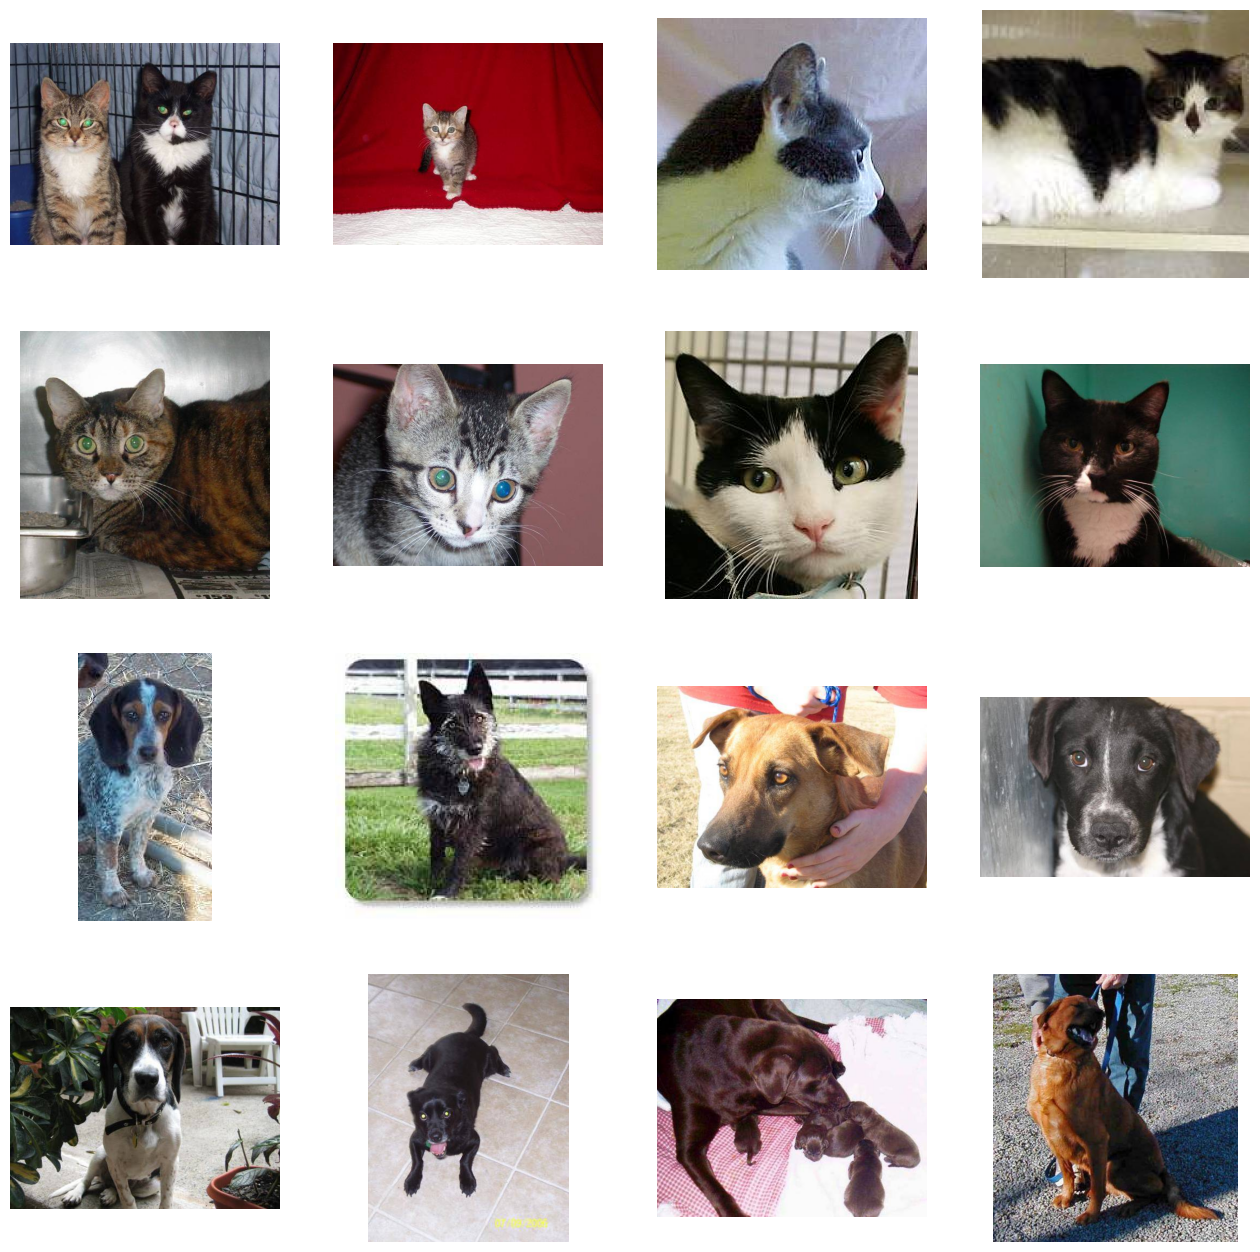

In [7]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/training_set/training_set/cats')
dog_dir = os.path.join('/content/training_set/training_set/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [8]:
base_dir='/content/training_set/training_set'
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 8005 files belonging to 2 classes.
Using 7205 files for training.
Found 8005 files belonging to 2 classes.
Using 800 files for validation.


Keras is an open-source library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.
Max pooling operation for 2D spatial data.

Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

The resulting output when using the "valid" padding option has a spatial shape (number of rows or columns) of: output_shape = math.floor((input_shape - pool_size) / strides) + 1 (when input_shape >= pool_size)

The resulting output shape when using the "same" padding option is: output_shape = math.floor((input_shape - 1) / strides) + 1

In [9]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

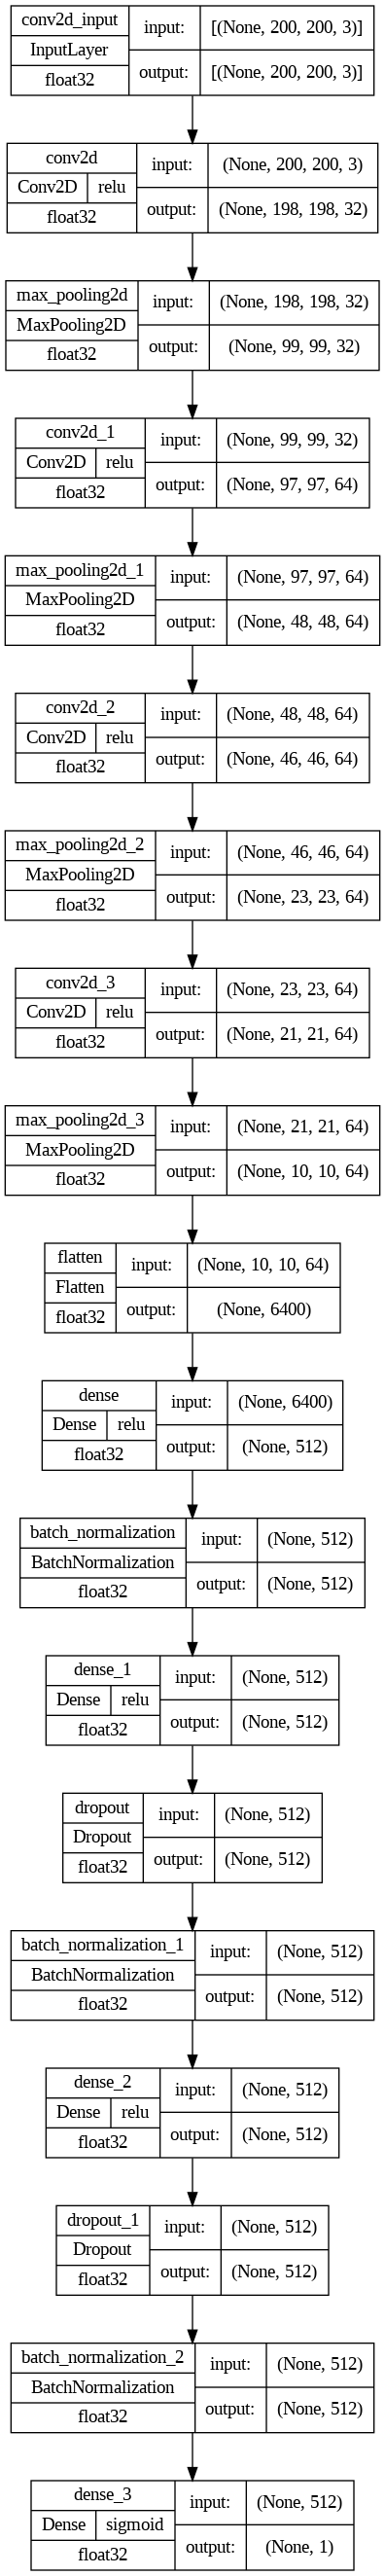

In [11]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [12]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass: An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network

In [13]:
history = model.fit(train_datagen,
          epochs=50,
          validation_data=test_datagen)

Epoch 1/50
226/226 [==============================] - 26s 60ms/step - loss: 0.7753 - accuracy: 0.5557 - val_loss: 1.2623 - val_accuracy: 0.4888
Epoch 2/50
226/226 [==============================] - 13s 56ms/step - loss: 0.6915 - accuracy: 0.5817 - val_loss: 0.8063 - val_accuracy: 0.5088
Epoch 3/50
226/226 [==============================] - 13s 56ms/step - loss: 0.6479 - accuracy: 0.6397 - val_loss: 0.7438 - val_accuracy: 0.5437
Epoch 4/50
226/226 [==============================] - 13s 57ms/step - loss: 0.6224 - accuracy: 0.6700 - val_loss: 12.0411 - val_accuracy: 0.4950
Epoch 5/50
226/226 [==============================] - 14s 58ms/step - loss: 0.6785 - accuracy: 0.5911 - val_loss: 0.7410 - val_accuracy: 0.5325
Epoch 6/50
226/226 [==============================] - 13s 56ms/step - loss: 0.6271 - accuracy: 0.6613 - val_loss: 1.4246 - val_accuracy: 0.4988
Epoch 7/50
226/226 [==============================] - 13s 56ms/step - loss: 0.5814 - accuracy: 0.7030 - val_loss: 2.1628 - val_accuracy

In [14]:
model.save('dog_vs_cat_classification_model.h5')
print("Model saved successfully.")

Model saved successfully.


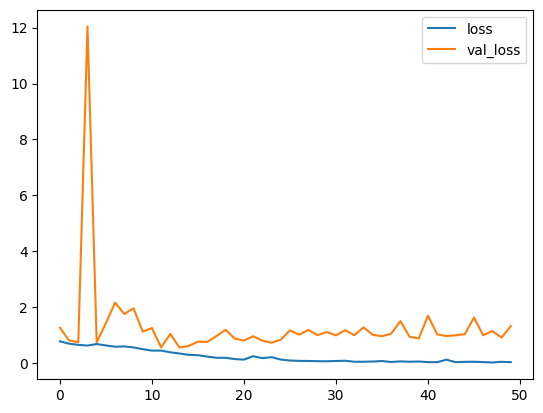

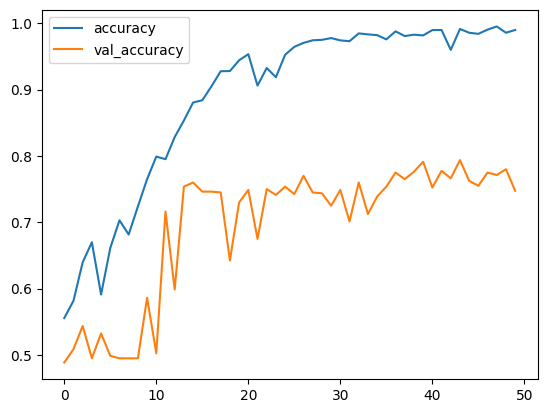

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 409ms/step
Dog


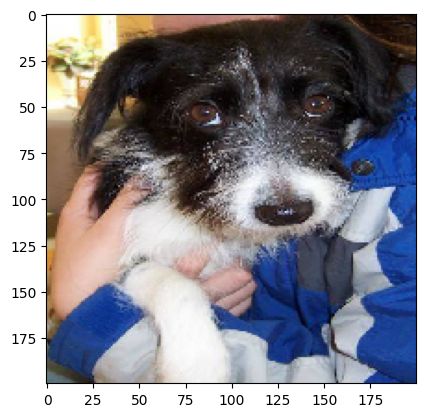

In [16]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/test_set/test_set/dogs/dog.4080.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

1/1 [==============================] - 0s 18ms/step
Cat


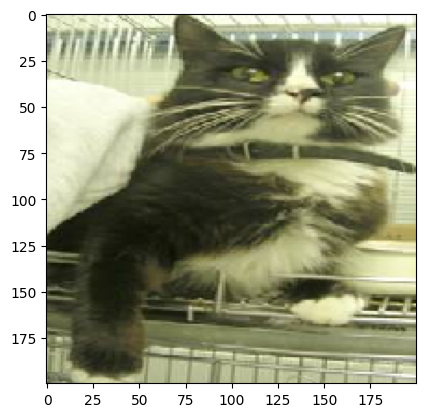

In [17]:
test_image = image.load_img('/content/test_set/test_set/cats/cat.4007.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")